# Project Title: Sales Data Cleaning and Visualization Project

In [1]:
# Load Data (First Python Code)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv('chatgpt_sales_data_pandas.csv')
df.head()

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date
0,1001,Alice,25.0,Female,New-York,Phone,1,700.0,05-01-2024
1,1002,Bob,32.0,Male,London,Laptop,1,1200.0,06-01-2024
2,1003,Charlie,NaN,Male,Paris,Tablet,2,800.0,07-01-2024
3,1004,David,45.0,Male,Delhi123,Phone,1,650.0,08-01-2024
4,1005,Eva,29.0,Female,Berlin,Headphones,3,300.0,09-01-2024


# Data Cleaning (We Go One-by-One)

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 29
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       25 non-null     int64         
 1   Customer_Name  25 non-null     object        
 2   Age            25 non-null     float64       
 3   Gender         25 non-null     object        
 4   City           25 non-null     object        
 5   Product        25 non-null     object        
 6   Quantity       25 non-null     int64         
 7   Sales          23 non-null     float64       
 8   Order_Date     25 non-null     datetime64[ns]
 9   Year           25 non-null     int32         
 10  Month          25 non-null     int32         
 11  Week_Day       25 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(5)
memory usage: 2.3+ KB
None


In [32]:
print(df.describe())

          Order_ID        Age   Quantity        Sales           Order_Date  \
count    25.000000  25.000000  25.000000    23.000000                   25   
mean   1015.600000  32.640000   1.640000  1006.086957  2024-01-17 14:24:00   
min    1001.000000  24.000000   1.000000   300.000000  2024-01-05 00:00:00   
25%    1009.000000  28.000000   1.000000   645.000000  2024-01-11 00:00:00   
50%    1016.000000  32.000000   1.000000   700.000000  2024-01-18 00:00:00   
75%    1022.000000  37.000000   2.000000  1200.000000  2024-01-24 00:00:00   
max    1030.000000  45.000000   5.000000  5000.000000  2024-02-01 00:00:00   
std       8.514693   6.257529   1.075484   940.250156                  NaN   

         Year  Month  
count    25.0  25.00  
mean   2024.0   1.04  
min    2024.0   1.00  
25%    2024.0   1.00  
50%    2024.0   1.00  
75%    2024.0   1.00  
max    2024.0   2.00  
std       0.0   0.20  


📌 Learn:

Which columns have missing values

Which columns are numbers

Range of values (min, max)

In [33]:
# Handling Missing Values (NaN)
#🔍 Check missing values
print(df.isnull().sum())

Order_ID         0
Customer_Name    0
Age              0
Gender           0
City             0
Product          0
Quantity         0
Sales            2
Order_Date       0
Year             0
Month            0
Week_Day         0
dtype: int64


In [34]:
# Fill missing Age with median (becz age has outlier thatswhy i fill this with median value)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [35]:
#verify
df.head()

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day
0,1001,Alice,25.0,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
1,1002,Bob,32.0,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday
3,1004,David,45.0,Male,Delhi,Phone,1,650.0,2024-01-08,2024,1,Monday
4,1005,Eva,29.0,Female,Berlin,Headphones,3,300.0,2024-01-09,2024,1,Tuesday
6,1007,Grace,34.0,Female,New York,Tablet,2,NaN,2024-01-11,2024,1,Thursday


In [36]:
#verify- this shows no missing values are there
df['Age'].isnull().sum()

0

In [37]:
df['Age'].describe()

count    25.000000
mean     32.640000
std       6.257529
min      24.000000
25%      28.000000
50%      32.000000
75%      37.000000
max      45.000000
Name: Age, dtype: float64

What you’ll notice: - What to fill in missing value, mean , median, or mode 

Most ages between 25–45

A few very high values (120, 150)

These are outliers.

Decision Rule (VERY IMPORTANT)

| Situation                  | Use    |
| -------------------------- | ------ |
| Numeric + normal data      | Mean   |
| Numeric + outliers         | Median |
| Categorical (Gender, City) | Mode   |


Interview-Ready Answer (MEMORIZE THIS)

“Age is a numeric column. I first checked its distribution and found outliers, so instead of mean, I used median to fill missing values because median is robust to outliers.”

🔥 This answer will impress interviewers.

In [38]:
# Fill missing Sales with median
#before this, verify sales has null value or not
df['Sales'].isnull().sum()

2

In [39]:
#so this is clear that sales has 2 missing value, lets see these missing value can be filled with mean, median or mode
df['Sales'].describe()

count      23.000000
mean     1006.086957
std       940.250156
min       300.000000
25%       645.000000
50%       700.000000
75%      1200.000000
max      5000.000000
Name: Sales, dtype: float64

In [40]:
#this is clear that Sales column has outlier bcz its max value is around 5000 which far than mean and min value.
#Sales

#Numeric

#Extreme value (5000)
df['Sales'] = df['Sales'].fillna(df['Sales'].median())

In [41]:
#verify
df['Sales']

0      700.0
1     1200.0
3      650.0
4      300.0
6      700.0
7      700.0
8     1300.0
9     1400.0
10     700.0
11    1200.0
13     500.0
14     650.0
15    1600.0
16     850.0
17     680.0
18     400.0
19    5000.0
20     780.0
21     620.0
22    1400.0
24     690.0
25     700.0
26     820.0
27     360.0
29     640.0
Name: Sales, dtype: float64

In [42]:
#OR--
df['Sales'].isnull().sum()

0

# Remove Duplicate Rows

In [43]:
#Remove Duplicate Rows
df.duplicated()

0     False
1     False
3     False
4     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
24    False
25    False
26    False
27    False
29    False
dtype: bool

In [44]:
#getting False value as no duplicate value in this data set
#but to Remove Duplicate Rows
df.drop_duplicates()

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day
0,1001,Alice,25.0,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
1,1002,Bob,32.0,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday
3,1004,David,45.0,Male,Delhi,Phone,1,650.0,2024-01-08,2024,1,Monday
4,1005,Eva,29.0,Female,Berlin,Headphones,3,300.0,2024-01-09,2024,1,Tuesday
6,1007,Grace,34.0,Female,New York,Tablet,2,700.0,2024-01-11,2024,1,Thursday
7,1008,Helen,28.0,Female,London,Phone,1,700.0,2024-01-12,2024,1,Friday
8,1009,Ian,41.0,Male,Paris,Laptop,1,1300.0,2024-01-13,2024,1,Saturday
9,1010,Jack,38.0,Male,Delhi,Phone,2,1400.0,2024-01-14,2024,1,Sunday
10,1011,Alice,25.0,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
11,1012,Bob,32.0,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday


# Data Type Conversion

In [45]:
#check data type of each
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 29
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       25 non-null     int64         
 1   Customer_Name  25 non-null     object        
 2   Age            25 non-null     float64       
 3   Gender         25 non-null     object        
 4   City           25 non-null     object        
 5   Product        25 non-null     object        
 6   Quantity       25 non-null     int64         
 7   Sales          25 non-null     float64       
 8   Order_Date     25 non-null     datetime64[ns]
 9   Year           25 non-null     int32         
 10  Month          25 non-null     int32         
 11  Week_Day       25 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(5)
memory usage: 2.3+ KB


In [46]:
#convert Age column data type in Float
df['Age'] = df['Age'].astype(int)

In [47]:
#check
df['Age'].dtype

dtype('int32')

In [48]:
#convert order_date into datetime formate
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [49]:
#STEP 1: Prove the Problem (Always Do This)
df['Order_Date'].unique()

<DatetimeArray>
['2024-01-05 00:00:00', '2024-01-06 00:00:00', '2024-01-08 00:00:00',
 '2024-01-09 00:00:00', '2024-01-11 00:00:00', '2024-01-12 00:00:00',
 '2024-01-13 00:00:00', '2024-01-14 00:00:00', '2024-01-16 00:00:00',
 '2024-01-17 00:00:00', '2024-01-18 00:00:00', '2024-01-19 00:00:00',
 '2024-01-20 00:00:00', '2024-01-21 00:00:00', '2024-01-22 00:00:00',
 '2024-01-23 00:00:00', '2024-01-24 00:00:00', '2024-01-25 00:00:00',
 '2024-01-27 00:00:00', '2024-01-28 00:00:00', '2024-01-29 00:00:00',
 '2024-01-30 00:00:00', '2024-02-01 00:00:00']
Length: 23, dtype: datetime64[ns]

STEP 2: Why This Happens in Real Life

In real companies:

Data comes from multiple systems

Some systems use:

US format → MM-DD-YYYY

Others use:

European format → DD-MM-YYYY

So this error is REALISTIC.

In [50]:
#STEP 3: Beginner-Friendly Fix (RECOMMENDED)
#✔ Tell pandas that day comes first
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst = True)

This works because:

13-01-2024 → 13th Jan 2024

2024-01-05 → still works fine

In [51]:
df.head()

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day
0,1001,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
1,1002,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday
3,1004,David,45,Male,Delhi,Phone,1,650.0,2024-01-08,2024,1,Monday
4,1005,Eva,29,Female,Berlin,Headphones,3,300.0,2024-01-09,2024,1,Tuesday
6,1007,Grace,34,Female,New York,Tablet,2,700.0,2024-01-11,2024,1,Thursday


🛡 STEP 4: Safest Fix (Production-Level)

This avoids crashing even if data is very messy.

df["Order_Date"] = pd.to_datetime(
    df["Order_Date"],
    dayfirst=True,
    errors="coerce"
)


📌 What errors="coerce" does:

If pandas can’t read a date

It converts it to NaT (missing date)

Your program does NOT crash

In [52]:
#STEP 5: Check Result (IMPORTANT)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 29
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       25 non-null     int64         
 1   Customer_Name  25 non-null     object        
 2   Age            25 non-null     int32         
 3   Gender         25 non-null     object        
 4   City           25 non-null     object        
 5   Product        25 non-null     object        
 6   Quantity       25 non-null     int64         
 7   Sales          25 non-null     float64       
 8   Order_Date     25 non-null     datetime64[ns]
 9   Year           25 non-null     int32         
 10  Month          25 non-null     int32         
 11  Week_Day       25 non-null     object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(5)
memory usage: 2.2+ KB


In [53]:
#And check missing dates / or check invalid dates
df['Order_Date'].isnull().sum()

0

🎯 INTERVIEW-READY EXPLANATION (MEMORIZE)

“The dataset had mixed date formats. I used pd.to_datetime() with dayfirst=True and errors='coerce' to safely convert the column without breaking the pipeline.”

🔥 This is a strong professional answer.

| Situation        | Solution                         |
| ---------------- | -------------------------------- |
| Same date format | `pd.to_datetime(col)`            |
| DD-MM-YYYY       | `dayfirst=True`                  |
| Mixed formats    | `dayfirst=True, errors="coerce"` |
| Messy real data  | Always use `errors="coerce"`     |


In [54]:
#See Which Rows Are Invalid
df[df['Order_Date'].isnull()]
#This shows problem rows (very useful for debugging).

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day


📌 Explanation:

dropna() → remove missing values

subset=["Order_Date"] → only check this column

In [55]:
#Check Data Shape
df.shape

(25, 12)

👉 This tells you:

How many rows remain

How many rows were removed

🎯 INTERVIEW-READY EXPLANATION (MEMORIZE)

“I converted the date column using pd.to_datetime with errors='coerce', counted invalid dates using isnull().sum(), and removed those records using dropna to ensure date integrity.”

🔥 This is exactly what interviewers want.

In [56]:
#extract Year from Order_Date
df['Year'] = df['Order_Date'].dt.year

In [57]:
#extract month
df['Month'] = df['Order_Date'].dt.month

In [58]:
#extract day
df['Week_Day'] = df['Order_Date'].dt.day_name()

In [59]:
#verify
df.head()

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day
0,1001,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
1,1002,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday
3,1004,David,45,Male,Delhi,Phone,1,650.0,2024-01-08,2024,1,Monday
4,1005,Eva,29,Female,Berlin,Headphones,3,300.0,2024-01-09,2024,1,Tuesday
6,1007,Grace,34,Female,New York,Tablet,2,700.0,2024-01-11,2024,1,Thursday


# 5️⃣ Outlier Detection (Beginner Logic)

In [60]:
#❌ Remove unrealistic ages
df = df[df['Age'] <= 100]

In [61]:
#verify
df['Age'].describe()

count    25.000000
mean     32.640000
std       6.257529
min      24.000000
25%      28.000000
50%      32.000000
75%      37.000000
max      45.000000
Name: Age, dtype: float64

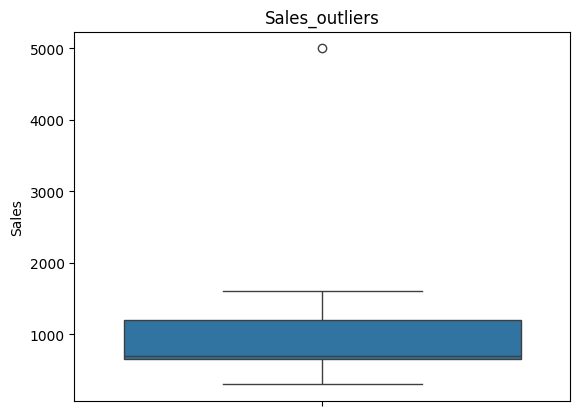

In [62]:
#verify using Visual check using boxplot
sns.boxplot(y=df['Sales'])
plt.title('Sales_outliers')
plt.show()

# 6️⃣ Regex for Text Cleaning

In [63]:
#Clean city names (remove numbers)
df['City'] = df['City'].str.replace(r"\d", "", regex = True)

In [64]:
#verify
df.head(15)

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day
0,1001,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
1,1002,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday
3,1004,David,45,Male,Delhi,Phone,1,650.0,2024-01-08,2024,1,Monday
4,1005,Eva,29,Female,Berlin,Headphones,3,300.0,2024-01-09,2024,1,Tuesday
6,1007,Grace,34,Female,New York,Tablet,2,700.0,2024-01-11,2024,1,Thursday
7,1008,Helen,28,Female,London,Phone,1,700.0,2024-01-12,2024,1,Friday
8,1009,Ian,41,Male,Paris,Laptop,1,1300.0,2024-01-13,2024,1,Saturday
9,1010,Jack,38,Male,Delhi,Phone,2,1400.0,2024-01-14,2024,1,Sunday
10,1011,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
11,1012,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday


In [65]:
#Replace hyphen with space
df['City'] = df['City'] .str.replace("-", " ")

In [66]:
#verify
df.head(
    10
)

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day
0,1001,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
1,1002,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday
3,1004,David,45,Male,Delhi,Phone,1,650.0,2024-01-08,2024,1,Monday
4,1005,Eva,29,Female,Berlin,Headphones,3,300.0,2024-01-09,2024,1,Tuesday
6,1007,Grace,34,Female,New York,Tablet,2,700.0,2024-01-11,2024,1,Thursday
7,1008,Helen,28,Female,London,Phone,1,700.0,2024-01-12,2024,1,Friday
8,1009,Ian,41,Male,Paris,Laptop,1,1300.0,2024-01-13,2024,1,Saturday
9,1010,Jack,38,Male,Delhi,Phone,2,1400.0,2024-01-14,2024,1,Sunday
10,1011,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
11,1012,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday


In [67]:
#Remove extra spaces with regex
df['City'] = df['City'].str.strip()

In [68]:
#If you want to trim spaces from ALL text columns
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

🔍 What this does (simple words):

df.apply() → go column by column

x.dtype == "object" → text columns only

.str.strip() → remove extra spaces

Numbers are left untouched


STEP 4: What Is x Here?

This is the MOST IMPORTANT PART.

❗ x is NOT a value
❗ x is NOT a row
❗ x is NOT a number

👉 x is ONE COLUMN (a pandas Series)

So:

First time → x = Order_ID column

Second time → x = Customer_Name column

Third time → x = Age column

… and so on

STEP 5: Are the Two x Different?

You asked:

“are both x different?”

👉 NO ❌
They are the same x.

This is just how Python syntax works:

lambda x: something_with_x


Meaning:

x → input

x → same input used inside

There is no second x.

In [72]:
df.head(15)

,Order_ID,Customer_Name,Age,Gender,City,Product,Quantity,Sales,Order_Date,Year,Month,Week_Day
0,1001,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
1,1002,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday
3,1004,David,45,Male,Delhi,Phone,1,650.0,2024-01-08,2024,1,Monday
4,1005,Eva,29,Female,Berlin,Headphones,3,300.0,2024-01-09,2024,1,Tuesday
6,1007,Grace,34,Female,New York,Tablet,2,700.0,2024-01-11,2024,1,Thursday
7,1008,Helen,28,Female,London,Phone,1,700.0,2024-01-12,2024,1,Friday
8,1009,Ian,41,Male,Paris,Laptop,1,1300.0,2024-01-13,2024,1,Saturday
9,1010,Jack,38,Male,Delhi,Phone,2,1400.0,2024-01-14,2024,1,Sunday
10,1011,Alice,25,Female,New York,Phone,1,700.0,2024-01-05,2024,1,Friday
11,1012,Bob,32,Male,London,Laptop,1,1200.0,2024-01-06,2024,1,Saturday


# 📊 STEP 5: Data Visualization

# 1️⃣ Histogram (Sales Distribution)

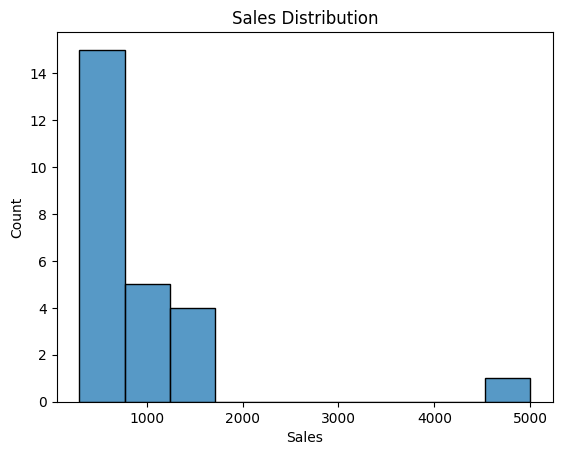

In [69]:
sns.histplot(df['Sales'], bins = 10)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

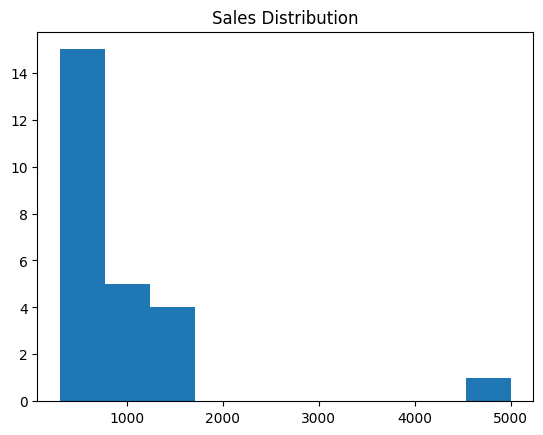

In [76]:
# same graph with matplotlib without using seaborn
plt.hist(df["Sales"], bins=10)
plt.title("Sales Distribution")
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

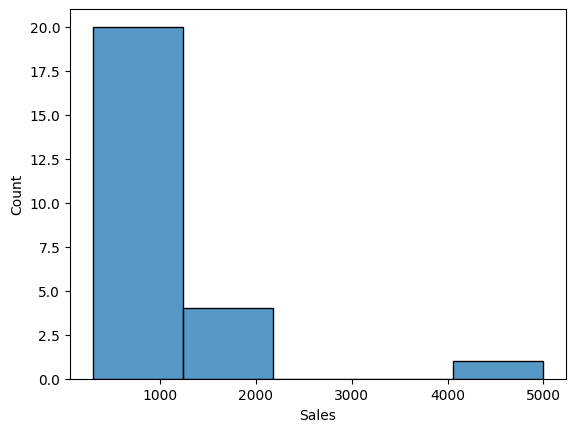

In [74]:
sns.histplot(df["Sales"], bins=5)


<Axes: xlabel='Sales', ylabel='Count'>

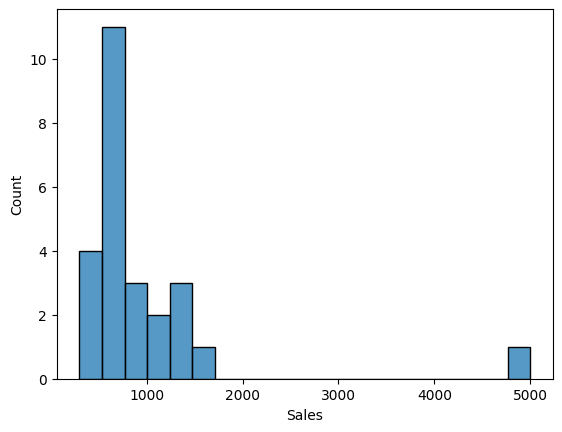

In [75]:
sns.histplot(df["Sales"], bins=20)


STEP 1: What Is a Histogram? (Plain English)

A histogram answers this question:

“How are sales values spread?”

It shows:

How many sales are small

How many are medium

How many are large

So Sales Distribution means:

“How often different sales values appear.”

1️⃣ sns.histplot(df["Sales"], bins=10)
What is sns?
import seaborn as sns


sns = Seaborn

Seaborn is used for statistical charts

It is built on top of matplotlib

What does histplot() do?
sns.histplot(data, bins=10)


Means:

“Create a histogram from this data.”

Here:

df["Sales"] → sales values

bins=10 → divide sales into 10 groups

📌 Example:

0–500
500–1000
1000–1500
...


Each bar shows:

How many sales fall into that range

2️⃣ plt.title("Sales Distribution")
What is plt?
import matplotlib.pyplot as plt


plt = Matplotlib

It controls chart appearance

🧠 Correct Mental Model (VERY IMPORTANT)
✔ Seaborn (sns)

Creates high-level charts

Histogram

Bar chart

Boxplot

Heatmap

✔ Matplotlib (plt)

Is the base engine

Controls:

Title

Labels

Figure size

Ticks

Showing the plot

📌 Seaborn uses matplotlib internally

STEP 4: Can Matplotlib Create Histogram Alone?

Yes 👇

plt.hist(df["Sales"], bins=10)
plt.title("Sales Distribution")
plt.show()


But:

More code

Less beautiful by default

That’s why we use seaborn.

STEP 5: Why Use BOTH Together?

Because:

Seaborn → makes nice charts easily

Matplotlib → gives full control

📌 This is standard in real projects.

STEP 6: Very Simple Rule (REMEMBER THIS)
Seaborn → WHAT to plot
Matplotlib → HOW it looks


# 2️⃣ Bar Chart (Sales by City)

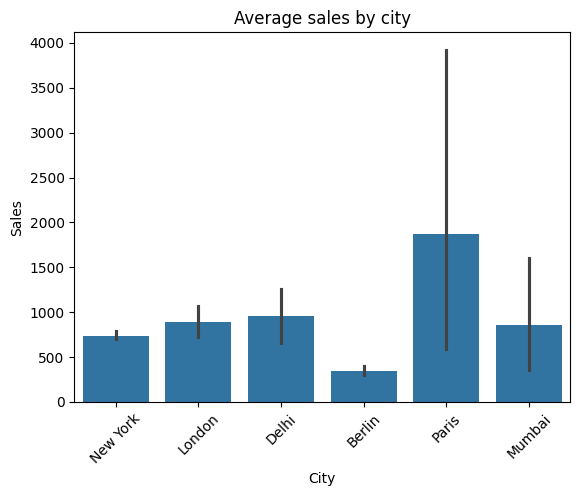

In [78]:
sns.barplot(x =  'City', y = 'Sales', data = df)
plt.title("Average sales by city")
plt.xticks(rotation = 45)
plt.show()

# 3️⃣ Boxplot (Age Distribution)

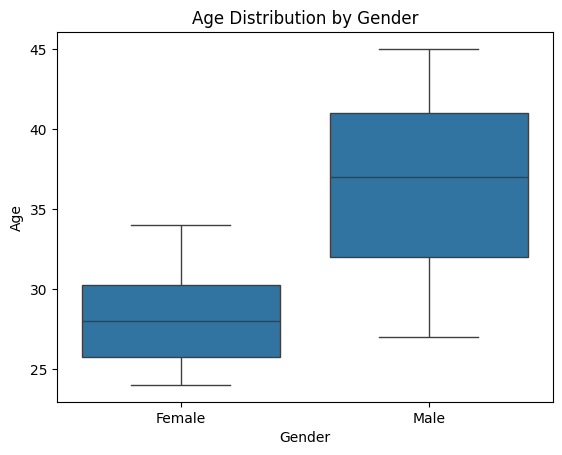

In [79]:
sns.boxplot(x = 'Gender', y = "Age", data = df)
plt.title('Age Distribution by Gender')
plt.show()

# 4️⃣ Heatmap (Correlation)

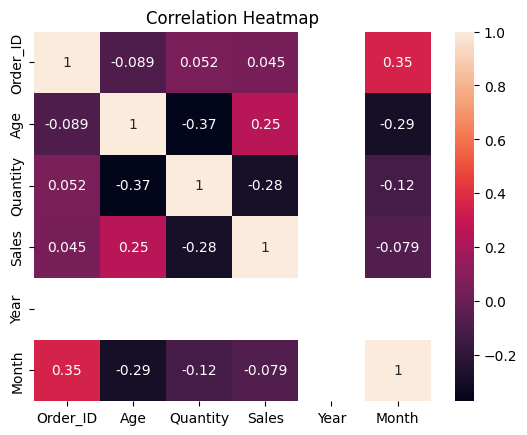

In [83]:
#Tell pandas: “Use only numeric columns”
corr_matrix = df.select_dtypes(include = "number").corr()

#Then plot:
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Heatmap')
plt.show()

What Chart Is This?

This is a Correlation Heatmap.

It answers this question:

“How strongly are numeric variables related to each other?”

Step 1: What Is Correlation? (VERY SIMPLE)

Correlation tells us:

If two numbers move together

Or move in opposite directions

Or have no relationship

Correlation value range:

-1  ←  0  →  +1

Value	Meaning
+1	Strong positive relationship
0	No relationship
-1	Strong negative relationship
Step 2: How to Read the Heatmap (RULES)
🔹 Rows and Columns

Each row = one numeric column

Each column = one numeric column

Example:

Age vs Sales

Quantity vs Sales

🔹 Diagonal Line (All 1’s)

A column compared with itself

Always 1

Ignore this part

🔹 Colors

Light / bright → stronger relationship

Dark → weaker or negative relationship

🔹 Numbers Inside Boxes

These are the exact correlation values.

Step 3: Now Let’s Read YOUR Heatmap (IMPORTANT)

We will read only meaningful relationships.

🔍 Age vs Quantity → -0.37

Meaning:

As age increases, quantity tends to decrease slightly.

Interpretation:

Older customers buy fewer items

Younger customers buy more quantity

📌 Moderate negative relationship.

🔍 Age vs Sales → 0.25

Meaning:

As age increases, sales slightly increase.

Interpretation:

Older customers spend a bit more

But relationship is weak

🔍 Quantity vs Sales → -0.28

Meaning:

More quantity does NOT always mean higher sales.

Why?

Some products are cheap but bought in bulk

Some expensive products are bought once

🔍 Order_ID vs Month → 0.35

Meaning:

Order IDs increase over time.

This is expected because:

Order_ID is sequential

Month increases as time passes

📌 This correlation is not business-meaningful.

🔍 Sales vs Month → -0.079

Meaning:

Sales do not depend much on month.

This is almost zero → no strong relationship.

Step 4: What NOT to Analyze (IMPORTANT)

❌ Order_ID correlations
❌ Diagonal values
❌ Very small values (near 0)

Because:

They don’t give business insight

Step 5: Strong vs Weak Correlation (REMEMBER)
Value Range	Strength
0.0 – 0.3	Weak
0.3 – 0.6	Moderate
0.6 – 1.0	Strong

Your heatmap shows:

Mostly weak relationships

No strong linear dependency

Step 6: Business-Level Interpretation (INTERVIEW GOLD)

You can say:

“The heatmap shows no strong correlations among variables. Age has a weak positive relationship with sales, while quantity shows a weak negative relationship, indicating independent buying behavior.”

🔥 Very professional.

Step 7: Why This Is GOOD News

This means:

Customers behave differently

Sales are not dominated by one factor

You need more features to predict sales

Step 8: Simple Mental Checklist for Heatmaps
Ignore diagonal
Look for |value| > 0.3
Check sign (+ or -)
Think business meaning

Final One-Line Summary (MEMORIZE)

“The correlation heatmap shows weak relationships among numeric variables, with no strong linear dependencies.”

In [84]:
#save modified csv file
df.to_csv('modified_chatgpt_sales_data_pandas', index  = False)